In [ ]:
# Page 146 of Python for Algorithmic Trading from idea to cloud deployment 
# Machine Learning
# Classification

# Logistic Regression for predicting Markets

In [2]:
import random 
import numpy as np 
import pandas as pd
from pylab import mpl, plt 
from sklearn import linear_model

plt.style.use('seaborn') 
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 


In [5]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

symbol = 'GLD'
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol: 'price'}, inplace=True)
data['return'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(inplace=True)

lags = 3

cols = [] 
for lag in range(1, lags + 1): 
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag) 
    cols.append(col)
    
data.dropna(inplace=True)


In [7]:
from sklearn.metrics import accuracy_score

lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs', multi_class='auto', max_iter=1000)

lm.fit(data[cols], np.sign(data['return']))
 

LogisticRegression(C=10000000.0, max_iter=1000)

In [8]:
data['prediction'] = lm.predict(data[cols])

data['prediction'].value_counts()

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [9]:
hits = np.sign(data['return'].iloc[lags:] * data['prediction'].iloc[lags:] ).value_counts()
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [10]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.5338375796178344

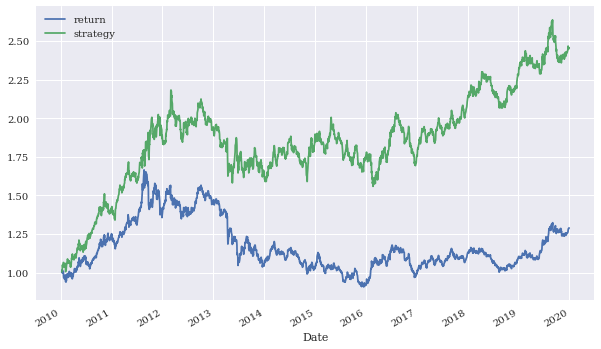

In [11]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

data[['return', 'strategy']].cumsum().apply(np.exp).plot( figsize=(10, 6));

Increasing the number of lags used from three to five decreases the hit ratio but improves the gross performance of the strategy to some extent

In [12]:
data = pd.DataFrame(raw[symbol])
data.rename(columns={symbol: 'price'}, inplace=True)
data['return'] = np.log(data['price'] / data['price'].shift(1))

lags = 5

cols = []
for lag in range(1, lags + 1): 
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
lm.fit(data[cols], np.sign(data['return']))


LogisticRegression(C=10000000.0, max_iter=1000)

In [14]:
data['prediction'] = lm.predict(data[cols])
data['prediction'].value_counts()

 1.0    2047
-1.0     464
Name: prediction, dtype: int64

In [15]:
hits = np.sign(data['return'].iloc[lags:] * data['prediction'].iloc[lags:] ).value_counts()
hits

 1.0    1331
-1.0    1163
 0.0      12
dtype: int64

In [16]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.5312624452409399

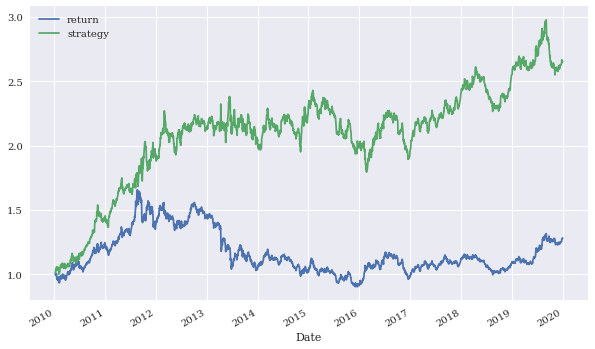

In [17]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)
data[['return', 'strategy']].cumsum().apply(np.exp).plot( figsize=(10, 6));